In [1]:
# %pip install numpy
# %pip install -q numpy scikit-learn imbalanced-learn
# %pip install ucimlrepo matplotlib
# %pip install -U imbalanced-learn fcmeans
# %pip install -U scikit-learn
# %pip install seaborn
# %pip install nbformat
# %pip show nbformat
# %pip install umap-learn

c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


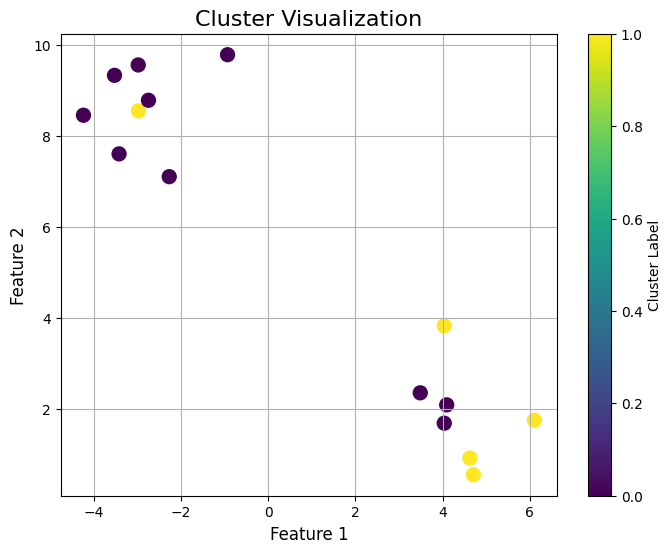

First few rows of the dataset:
   Feature 1  Feature 2  species
0   4.038172   3.825448        1
1   4.039240   1.681476        1
2  -2.267235   7.101006        1
3   6.105528   1.747393        1
4   4.707407   0.548421        1
    Feature 1  Feature 2  species
10  -0.929985   9.781721        1
11  -2.972615   8.548556        1
12  -2.743351   8.780149        1
13  -2.978672   9.556846        1
14   4.626382   0.915459        1


Detailed information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  15 non-null     float64
 1   Feature 2  15 non-null     float64
 2   species    15 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 492.0 bytes
None


Summary statistics of the dataset:
       Feature 1  Feature 2  species
count  15.000000  15.000000     15.0
mean    0.535726   5.486797      1.0
std     3.885

In [2]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from umap import UMAP
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# Fetch dataset from UCI

# Data as pandas DataFrames
X, y = make_blobs(n_samples=15, centers=2, random_state=42, cluster_std=1.0)

X = pd.DataFrame([[4.038172223998704, 3.82544786844967], [4.039240146309297, 1.6814759341474552], [-2.267235351486716, 7.101005883540523], [6.105527605149655, 1.7473933834541964], [4.707407040916025, 0.5484214977272752], [-3.5220287433871738, 9.328533460793595], [-4.234115455565783, 8.45199859895735], [4.095496111702919, 2.0840922736505982], [3.488885258805799, 2.348867702286404], [-3.417221698573961, 7.60198242686303], [-0.9299848075453587, 9.78172085735123], [-2.9726153158652124, 8.548556374628065], [-2.743350997776086, 8.78014917124914], [-2.978672008987702, 9.556846171784287], [4.626381611490167, 0.9154587549848316]], columns=['Feature 1', 'Feature 2'])
y = pd.DataFrame([[1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1]], columns=['species'])


# Combine features and target into a single DataFrame
df = pd.DataFrame(X, columns=['Feature 1' ,"Feature 2"])  # Create DataFrame for features
df['species'] = y  # Add the target column (species)

unique_values = pd.unique(y.iloc[:, 0])
for i in range(len(unique_values)):
    df['species'] = df['species'].replace(unique_values[i], i)


# Plot the clusters
plt.figure(figsize=(8,6))

# Scatter plot with color coding for different clusters
plt.scatter(X['Feature 1'], X['Feature 2'], c=y['species'], cmap='viridis', s=100)

# Add labels and title
plt.title('Cluster Visualization', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

# Show color bar and plot
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()



# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())
print(df.tail())
print("\n")

# Get detailed information about the DataFrame
print("Detailed information about the DataFrame:")
print(df.info())
print("\n")

# Get summary statistics
print("Summary statistics of the dataset:")
print(df.describe())
print("\n")

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())
print("\n")

# Get the count of different species
species_counts = df['species'].value_counts()
print("Counts of different species in the dataset:")
print(species_counts)
print("\n")



# # Separate features for UMAP projection (excluding 'species' column)
# features = df.iloc[:, :-1]

# # UMAP for 2D and 3D projections
# umap_2d = UMAP(n_components=2, init='random', random_state=0)
# umap_3d = UMAP(n_components=3, init='random', random_state=0)

# # Perform UMAP projections
# proj_2d = umap_2d.fit_transform(features)  # 2D projection
# proj_3d = umap_3d.fit_transform(features)  # 3D projection

# # 2D Scatter plot using Plotly
# fig_2d = px.scatter(
#     proj_2d, x=0, y=1,
#     color=df['species'], labels={'color': 'species'}
# )

# # 3D Scatter plot using Plotly
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df['species'], labels={'color': 'species'}
# )
# fig_3d.update_traces(marker_size=5)

# # Display the plots
# fig_2d.show()
# fig_3d.show()

# Pairplot to visualize relationships (optional)
# sns.pairplot(df, hue='species')
# plt.title('Pairplot of Dataset')
# plt.show()


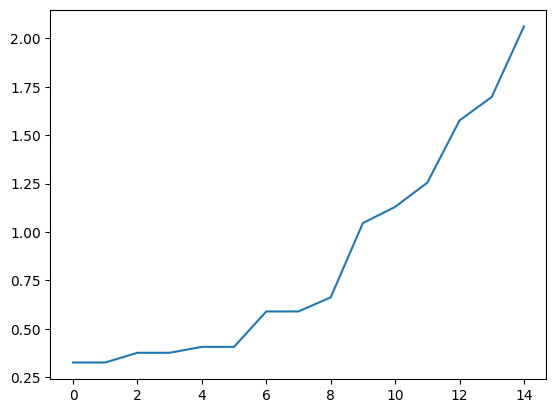

In [3]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Extracting the clusters using DBSCAN...


c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\umap\umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Silhouette Score for the clustering: 0.9131


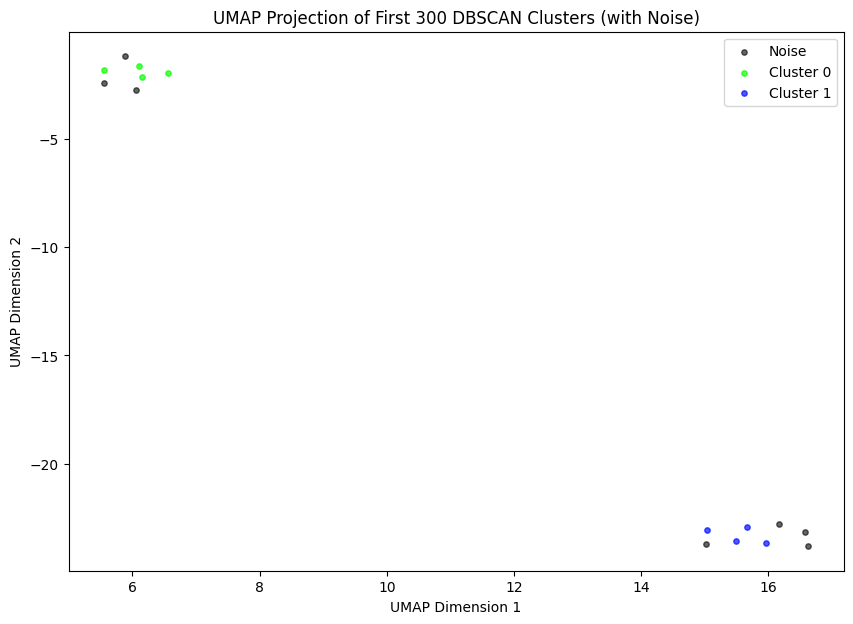

Number of clusters extracted: 2


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_k_clusters_with_dbscan_and_visualize(X, k, eps=0.5, min_samples=5):
    """
    Extracts the first k clusters from the data using the DBSCAN algorithm, 
    reduces dimensions using UMAP, and visualizes the clusters, including noise points.
    Also calculates and prints the silhouette score for the clustering.

    Args:
    - X: Feature matrix
    - k: Number of clusters to extract
    - eps: Maximum distance between two samples for them to be considered as in the same neighborhood.
    - min_samples: Minimum number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
    - k_clusters: List of the first k clusters (without reduced dimensions).
    """
    # Step 1: Apply DBSCAN to get the clusters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)

    # Get the cluster labels
    cluster_labels = dbscan.labels_

    # Step 2: Identify the first k clusters
    unique_labels = np.unique(cluster_labels)
    k_clusters = []
    selected_clusters = []
    selected_labels = []
    
    for label in unique_labels:
        if label != -1 and len(k_clusters) < k:  # Ignore noise (-1) and get k clusters
            cluster = X[cluster_labels == label]
            k_clusters.append(cluster)
            selected_clusters.append(cluster)
            selected_labels.append(np.full(len(cluster), label))
    
    # Step 3: Add noise to selected data for visualization
    noise = X[cluster_labels == -1]  # Extract noise points
    if len(noise) > 0:
        selected_clusters.append(noise)
        selected_labels.append(np.full(len(noise), -1))  # Mark noise points as -1

    # Concatenate all selected clusters into one matrix for UMAP
    if len(selected_clusters) > 0:
        X_selected = np.vstack(selected_clusters)
        labels_selected = np.concatenate(selected_labels)
    else:
        X_selected = np.array([])  # Empty case
        labels_selected = np.array([])
    # Step 4: Reduce dimensions using UMAP
    umap_2d = UMAP(n_components=2, random_state=42)
    reduced_X = umap_2d.fit_transform(X_selected)



    # Step 5: Visualize the reduced clusters, including noise
    plt.figure(figsize=(10, 7))

    # Generate a color palette for clusters (excluding noise, which is black)
    palette = sns.color_palette("hsv", len(np.unique(labels_selected)) - 1)  # Exclude noise from palette
    
    for label in np.unique(labels_selected):
        if label == -1:
            # Plot noise points in black
            plt.scatter(reduced_X[labels_selected == label, 0], reduced_X[labels_selected == label, 1], 
                        c='black', label='Noise', s=15, alpha=0.6)
        else:
            # Plot clusters with different colors
            plt.scatter(reduced_X[labels_selected == label, 0], reduced_X[labels_selected == label, 1], 
                        c=[palette[label] if label < len(palette) else 'gray'], 
                        label=f'Cluster {label}', s=15, alpha=0.7)
    

    non_noise_indices = cluster_labels != -1  # Exclude noise (-1) points
    if np.unique(cluster_labels[non_noise_indices]).size > 1:
        silhouette_avg = silhouette_score(X[non_noise_indices], cluster_labels[non_noise_indices])
        print(f'Silhouette Score for the clustering: {silhouette_avg:.4f}')
    else:
        print('Silhouette score could not be calculated because only one cluster was found.')
    # Set title and axis labels
    plt.title(f'UMAP Projection of First {k} DBSCAN Clusters (with Noise)')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend()
    plt.show()

   

    return k_clusters  # Only return the extracted clusters


# Example Usage
print("Extracting the clusters using DBSCAN...")
Clusters = extract_k_clusters_with_dbscan_and_visualize(X, k=300, eps=1, min_samples=4)
print("Number of clusters extracted:", len(Clusters))
num_clusters = len(Clusters)


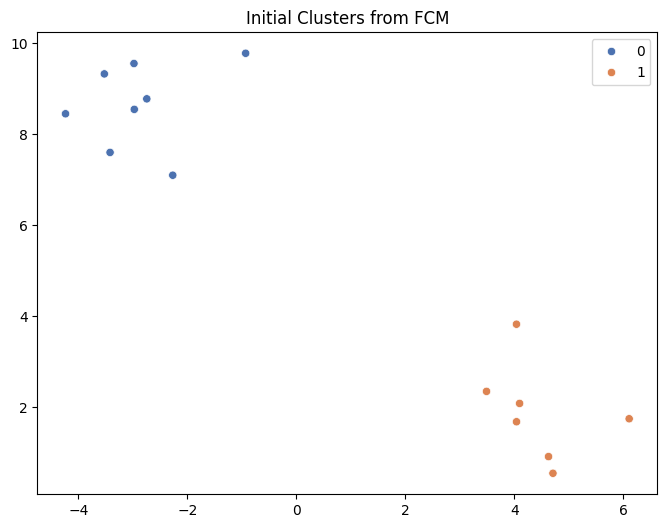

In [12]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from fcmeans import FCM
from sklearn.neighbors import NearestNeighbors
import copy
import warnings
import math
import copy
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import euclidean_distances
from imblearn.over_sampling.base import BaseOverSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.exceptions import raise_isinstance_error
from imblearn.utils import check_neighbors_object
from imblearn.utils.deprecation import deprecate_parameter
import seaborn as sns

class FCMCENTERSMOTE(BaseOverSampler):

    def __init__(self, sampling_strategy='auto', random_state=None, kmeans_args=None, smote_args=None,
                 imbalance_ratio_threshold=1.0, density_power=None, use_minibatch_kmeans=True, n_jobs=1, **kwargs):
        super(FCMCENTERSMOTE, self).__init__(sampling_strategy=sampling_strategy, **kwargs)
        if kmeans_args is None:
            kmeans_args = {}
        if smote_args is None:
            smote_args = {}
        self.imbalance_ratio_threshold = imbalance_ratio_threshold
        self.kmeans_args = copy.deepcopy(kmeans_args)
        self.smote_args = copy.deepcopy(smote_args)
        self.random_state = random_state
        self.n_jobs = n_jobs
        self.use_minibatch_kmeans = use_minibatch_kmeans
        self.density_power = density_power

    def _cluster(self, X):
        fcm = FCM(**self.kmeans_args)
        fcm.fit(X)
        fcm_labels = fcm.predict(X)
        cluster_assignment = np.asarray(fcm_labels)
        # Visualize initial clusters
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_assignment, palette='deep', legend='full')
        plt.title("Initial Clusters from FCM")
        plt.show()
        return cluster_assignment

    def _filter_clusters(self, X, y, cluster_assignment, minority_class_label):
      largest_cluster_label = np.max(np.unique(cluster_assignment))
      sparsity_factors = np.zeros((largest_cluster_label + 1,), dtype=np.float64)
      minority_mask = (y == minority_class_label)
      imbalance_ratio_threshold = self.imbalance_ratio_threshold

      if isinstance(imbalance_ratio_threshold, dict):
          imbalance_ratio_threshold = imbalance_ratio_threshold.get(minority_class_label, 1.0)

      for i in np.unique(cluster_assignment):
          cluster = X[cluster_assignment == i]
          mask = minority_mask[cluster_assignment == i]
          minority_count = np.sum(mask)
          majority_count = np.sum(~mask)
          imbalance_ratio = (majority_count + 1) / (minority_count + 1)

          if (imbalance_ratio < imbalance_ratio_threshold) and (minority_count > 1):
              distances = euclidean_distances(cluster[mask])
              non_diagonal_distances = distances[~np.eye(distances.shape[0], dtype=bool)]
              average_minority_distance = np.mean(non_diagonal_distances) if non_diagonal_distances.size > 0 else 0.0

              if average_minority_distance == 0:
                  average_minority_distance = 1e-1

              density_factor = minority_count / (average_minority_distance ** self.density_power)
              sparsity_factors[i] = 1 / density_factor

      sparsity_sum = np.sum(sparsity_factors)
      if sparsity_sum == 0:
          sparsity_sum = 1

      sampling_weights = sparsity_factors / sparsity_sum if sparsity_sum != 0 else np.full(sparsity_factors.shape, 1.0)
      return sampling_weights
    @staticmethod
    def smote_oversample_with_cluster_center(X, y, cluster_center, sampling_ratio=1.0, smote_args=None, k=5):
        if smote_args is not None and 'k_neighbors' in smote_args:
            k = smote_args['k_neighbors']
        minority_class = np.unique(y)[np.argmin(np.bincount(y))]
        minority_indices = np.where(y == minority_class)[0]

        # Ensure the cluster_center belongs to the minority class region
        if cluster_center is not None:
            num_minority_samples = len(minority_indices)
            num_majority_samples = int(sampling_ratio * len(y)) - num_minority_samples
            k = min(k, num_minority_samples-1)#REMEMBER
            # Find the k-nearest neighbors from the minority class around the cluster center
            knn = NearestNeighbors(n_neighbors=k)
            knn.fit(X[minority_indices])
            nn_indices = knn.kneighbors([cluster_center], return_distance=False)[0]

            synthetic_samples = []
            for i in range(num_minority_samples):
                nn_index = np.random.choice(nn_indices)
                diff = X[minority_indices[nn_index]] - cluster_center
                synthetic_sample = cluster_center + np.random.rand() * diff
                synthetic_samples.append(synthetic_sample)
            synthetic_samples = np.array(synthetic_samples)


            # Resample X and y
            X_resampled = np.vstack((X, synthetic_samples))
            y_resampled = np.hstack((y, np.full(len(synthetic_samples), minority_class)))

            # Shuffle the resampled dataset
            shuffle_indices = np.random.permutation(len(X_resampled))
            X_resampled = X_resampled[shuffle_indices]
            y_resampled = y_resampled[shuffle_indices]

            return X_resampled, y_resampled
        else:
            return X, y


    def _fit_resample(self, X, y):
        """Resample the dataset.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Matrix containing the data which have to be sampled.

        y : ndarray, shape (n_samples, )
            Corresponding label for each sample in X.

        Returns
        -------
        X_resampled : ndarray, shape (n_samples_new, n_features)
            The array containing the resampled data.

        y_resampled : ndarray, shape (n_samples_new)
            The corresponding labels of ``X_resampled``

        """
        self._set_subalgorithm_params()

        if self.density_power is None:
            self.density_power = X.shape[1]

        resampled = [ (X.copy(), y.copy()) ]
        sampling_ratio = {k: v for k, v in self.sampling_strategy_.items()}
        # sampling_strategy_ does not contain classes where n_samples 0
        for class_label in np.unique(y):
            if class_label not in sampling_ratio:
                sampling_ratio[class_label] = 0
        for minority_class_label, n_samples in sampling_ratio.items():
            if n_samples == 0:
                continue

            cluster_assignment = self._cluster(X)
            sampling_weights = self._filter_clusters(X, y, cluster_assignment, minority_class_label)
            smote_args = self.smote_args.copy()
            if np.count_nonzero(sampling_weights) > 0:
                # perform k-means smote
                for i in np.unique(cluster_assignment):
                    cluster_X = X[cluster_assignment == i]
                    cluster_y = y[cluster_assignment == i]
                    if sampling_weights[i] > 0:
                        # determine ratio for oversampling the current cluster
                        target_ratio = {label: np.count_nonzero(cluster_y == label) for label in sampling_ratio}
                        cluster_minority_count = np.count_nonzero(cluster_y == minority_class_label)
                        generate_count = int(round(n_samples * sampling_weights[i]))
                        target_ratio[minority_class_label] = generate_count + cluster_minority_count

                        # make sure that cluster_y has more than 1 class, adding a random point otherwise
                        remove_index = -1
                        if np.unique(cluster_y).size < 2:
                            remove_index = cluster_y.size
                            cluster_X = np.append(cluster_X, np.zeros((1,cluster_X.shape[1])), axis=0)
                            majority_class_label = next( key for key in sampling_ratio.keys() if key != minority_class_label )
                            target_ratio[majority_class_label] = 1 + target_ratio[majority_class_label]
                            cluster_y = np.append(cluster_y, np.asarray(majority_class_label).reshape((1,)), axis=0)

                        # clear target ratio of labels not present in cluster
                        for label in list(target_ratio.keys()):
                            if label not in cluster_y:
                                del target_ratio[label]

                        # # modify copy of the user defined smote_args to reflect computed parameters
                        # smote_args['sampling_strategy'] = target_ratio

                        # smote_args = self._validate_smote_args(smote_args, cluster_minority_count)
                        # # Get the center of the cluster to use as the point for SMOTE oversampling
                        cluster_center = np.mean(cluster_X, axis=0)
                        # k_value = smote_args['k_neighbors']
                        # X_resampled_cluster, y_resampled_cluster = self.smote_oversample_with_cluster_center(
                        #     X, y, cluster_center, sampling_ratio=n_samples / X.shape[0],
                        #     k=k_value)

                        # if k_neighbors is 0, perform random oversampling instead of smote
                        if 'k_neighbors' in smote_args and smote_args['k_neighbors'] == 0:
                                oversampler_args = {}
                                if 'random_state' in smote_args:
                                    oversampler_args['random_state'] = smote_args['random_state']
                                oversampler = RandomOverSampler(**oversampler_args)

                        # finally, apply smote to cluster
                        with warnings.catch_warnings():
                            # ignore warnings about minority class getting bigger than majority class
                            # since this would only be true within this cluster
                            warnings.filterwarnings(action='ignore', category=UserWarning, message=r'After over-sampling, the number of samples \(.*\) in class .* will be larger than the number of samples in the majority class \(class #.* \-\> .*\)')
                            cluster_resampled_X, cluster_resampled_y = self.smote_oversample_with_cluster_center(
                            cluster_X, cluster_y, cluster_center, sampling_ratio=n_samples / X.shape[0],
                            k=smote_args['k_neighbors'])

                        if remove_index > -1:
                            # since SMOTE's results are ordered the same way as the data passed into it,
                            # the temporarily added point is at the same index position as it was added.
                            for l in [cluster_resampled_X, cluster_resampled_y, cluster_X, cluster_y]:
                                np.delete(l, remove_index, 0)

                        # add new generated samples to resampled
                        resampled.append( (
                            cluster_resampled_X[cluster_y.size:,:],
                            cluster_resampled_y[cluster_y.size:]))
            else:
                # all weights are zero -> perform regular smote
                warnings.warn('No minority clusters found for class {}. Performing regular SMOTE. Try changing the number of clusters.'.format(minority_class_label))
                target_ratio = {label: np.count_nonzero(y == label) for label in sampling_ratio}
                target_ratio[minority_class_label] = sampling_ratio[minority_class_label]
                minority_count = np.count_nonzero(y == minority_class_label)
                smote_args = self._validate_smote_args(smote_args, minority_count)
                # Get the center of the cluster to use as the point for SMOTE oversampling
                cluster_center = np.mean(X, axis=0)
                X_resampled_cluster, y_resampled_cluster = self.smote_oversample_with_cluster_center(
                    X, y, cluster_center, sampling_ratio=n_samples / X.shape[0],
                            k=smote_args['k_neighbors'])


        resampled = list(zip(*resampled))
        if(len(resampled) > 0):
            X_resampled = np.concatenate(resampled[0], axis=0)
            y_resampled = np.concatenate(resampled[1], axis=0)
        return X_resampled, y_resampled

    def _validate_smote_args(self, smote_args, minority_count):
      max_k_neighbors = minority_count - 1
      if 'k' in smote_args and smote_args['k'] > max_k_neighbors:
          smote_args['k'] = max_k_neighbors
      return smote_args

    def _set_subalgorithm_params(self):
      if self.random_state is not None:
          if 'random_state' not in self.smote_args:
              self.smote_args['random_state'] = self.random_state
          if 'random_state' not in self.kmeans_args:
              self.kmeans_args['random_state'] = self.random_state

      if self.n_jobs is not None:
          if 'n_jobs' not in self.smote_args:
              self.smote_args['n_jobs'] = self.n_jobs
          if 'n_jobs' not in self.kmeans_args:
              if not self.use_minibatch_kmeans:
                  self.kmeans_args['n_jobs'] = self.n_jobs
FCM_smote = FCMCENTERSMOTE(
    kmeans_args={'n_clusters': num_clusters},
    smote_args={'k_neighbors': 3},
    imbalance_ratio_threshold=1,
    density_power=4
)
X_resampled, y_resampled = FCM_smote.fit_resample(X.values, y.values)

In [13]:
import numpy as np

# Calcul des instances par classe
class_counts = dict(zip(*np.unique(y, return_counts=True)))

# Affichage du nombre d'instances par classe
for label, count in class_counts.items():
    print('Class {} has {} instances'.format(label, count))

# Création et utilisation de FCM_smote
# FCM_smote = FCMCENTERSMOTE(
#     kmeans_args={'n_clusters': num_clusters},
#     smote_args={'k_neighbors': 5},
#     imbalance_ratio_threshold=1,
#     density_power=4
# )
# X_resampled, y_resampled = FCM_smote.fit_resample(X.values, y.values)

[print('Class {} has {} instances after oversampling'.format(label, count))
 for label, count in zip(*np.unique(y_resampled, return_counts=True))]

Class 0 has 10 instances
Class 1 has 5 instances
Class 0 has 10 instances after oversampling
Class 1 has 8 instances after oversampling


[None, None]

In [14]:
import numpy as np
import pandas as pd
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Apply standard scaling (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale original dataset features
X_resampled_scaled = scaler.transform(X_resampled)  # Scale resampled dataset

# Step 1: Fit UMAP on the resampled dataset
umap = UMAP(n_components=2, init='random', random_state=42)
proj_resampled = umap.fit_transform(X_resampled_scaled)

# Step 2: Fit UMAP on the original dataset for comparison
proj_original = umap.transform(X_scaled)

# Step 3: Create a DataFrame to store UMAP projections for resampled data
df_resampled = pd.DataFrame(proj_resampled, columns=['UMAP1', 'UMAP2'])
df_resampled['Class'] = y_resampled  # Add class labels for resampled data

# Step 4: Identify synthetic points (newly added) by checking for duplicates
original_length = len(X)  # Number of instances before resampling
df_resampled['is_synthetic'] = ['Synthetic' if i >= original_length else 'Original' for i in range(len(X_resampled))]

# Step 5: Plot the result using Plotly
fig = px.scatter(
    df_resampled, x='UMAP1', y='UMAP2', 
    color='Class', symbol='is_synthetic', 
    title="UMAP Projection of Resampled Data",
    labels={'color': 'Class'}
)

# Display the plot
fig.show()


c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Shape of X_resampled: (18, 2)
Shape of y_resampled: (18,)
Data type of X_resampled: float64
Data type of y_resampled: int64


c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



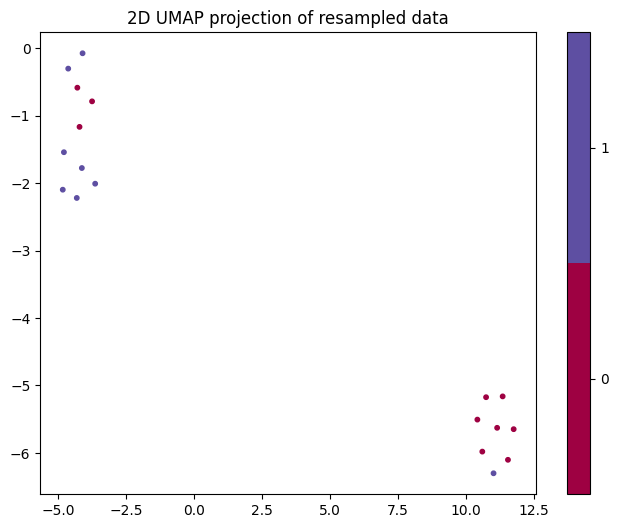

In [15]:
import umap
import matplotlib.pyplot as plt
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)
print("Data type of X_resampled:", X_resampled.dtype)
print("Data type of y_resampled:", y_resampled.dtype)



# Initialize UMAP and reduce dimensions
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_embedded = reducer.fit_transform(X_resampled)

# Scatter plot of the resampled data
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_resampled, cmap='Spectral', s=10)
plt.colorbar(boundaries=np.arange(len(np.unique(y_resampled))+1)-0.5).set_ticks(np.arange(len(np.unique(y_resampled))))
plt.title('2D UMAP projection of resampled data')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, roc_auc_score
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# Define a function to compute specificity for multi-class
def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificities = []
    for i in range(len(cm)):  # Loop through each class
        tn = sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])
        fp = sum(cm[:, i]) - cm[i, i]
        specificity_class = tn / (tn + fp)
        specificities.append(specificity_class)
    return np.mean(specificities)

# Sensitivity (same as recall, macro average)
def sensitivity(y_true, y_pred):
    return recall_score(y_true, y_pred, average='macro')

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics for multi-class classification
recall = recall_score(y_test, y_pred, average="macro")
specificity_val = specificity(y_test, y_pred)
g_mean = (recall * specificity_val) ** 0.5

# Print the performance metrics
print("Recall (macro):", recall)
print("Specificity (macro):", specificity_val)
print("Precision (macro):", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", metrics.recall_score(y_test, y_pred, average="macro"))
print("G-Mean:", g_mean)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score (macro):", metrics.f1_score(y_test, y_pred, average="macro"))

# For AUC in multi-class, use the OneVsRestClassifier approach
try:
    print("AUC:", roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro'))
except ValueError as e:
    print("AUC could not be calculated:", e)


Recall (macro): 0.5
Specificity (macro): 0.5
Precision (macro): 0.25
Recall (macro): 0.5
G-Mean: 0.5
Accuracy: 0.5
F1-score (macro): 0.3333333333333333
AUC: 0.5


c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\91843\Documents\VsCode Codes\Intuitionistic-FCM-Smote\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot original data
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
if isinstance(y, pd.Series):
    y = y.to_numpy()

# Display the count of original data points
print(f"Original data point count: {X.shape[0]}")

# Selecting two features (feature 0 and feature 1) for the graph, assuming 2D or more data
if X.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    # Add jitter to separate overlapping points slightly
    jittered_X = X + np.random.normal(scale=0.01, size=X.shape)
    # Create scatter plot with different colors for different classes
    sns.scatterplot(x=jittered_X[:, 0], y=jittered_X[:, 1], hue=y, palette='Set1', s=60, edgecolor='k')
    plt.title(f"Original Data (Total points: {X.shape[0]})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Class')
    plt.show()
else:
    print("Insufficient features for 2D plot.")

# Plot resampled data
if isinstance(X_resampled, pd.DataFrame):
    X_resampled = X_resampled.to_numpy()
if isinstance(y_resampled, pd.Series):
    y_resampled = y_resampled.to_numpy()

# Display the count of resampled data points
print(f"Resampled data point count: {X_resampled.shape[0]}")

# Selecting two features (feature 0 and feature 1) for the graph, assuming 2D or more data
if X_resampled.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    # Add jitter to separate overlapping points slightly
    
    jittered_X_resampled = X_resampled + np.random.normal(scale=0.01, size=X_resampled.shape)
    # Create scatter plot with different colors for different classes
    sns.scatterplot(x=jittered_X_resampled[:, 0], y=jittered_X_resampled[:, 1], hue=y_resampled, palette='Set2', s=60, edgecolor='k', marker='D')
    plt.title(f"Resampled Data (Total points: {X_resampled.shape[0]})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Class')
    plt.show()
else:
    print("Insufficient features for 2D plot.")
